# 머신러닝 이진 분류 수행 - 전복 데이터(label : Rings 고리(나이)) 

In [15]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

# 이진 분류 문제
df = pd.read_csv("C:/Users/tansy/Ai/abalone.csv", index_col=0)
# 카테고리형 변수 처리 (성별을 원-핫 인코딩)
df = pd.get_dummies(df, columns=['Sex'], drop_first=False)
df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
id,,,,,,,,,,,
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,True,False,False
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,False,False,True
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,False,False,True


NameError: name 'plt' is not defined

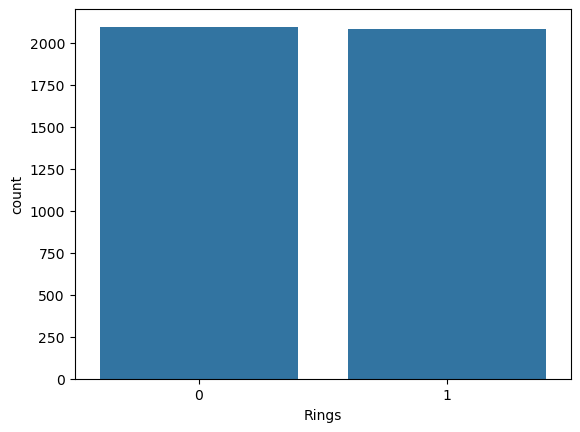

In [3]:
# OutCome 당 데이터 개수 확인(0, 1) 

df['Rings'] = np.where(df['Rings'] <= 9, 0, 1)

sns.countplot(data= df , x="Rings") 
plt.xlabel("Rings")
plt.ylabel('Count')
plt.title("Rings") 

In [ ]:
# 결측치 확인. 결측치란 : 데이터에 값이 없는 것.(Null), 속성값 0 => 결측치 없음 
df.isnull().sum()

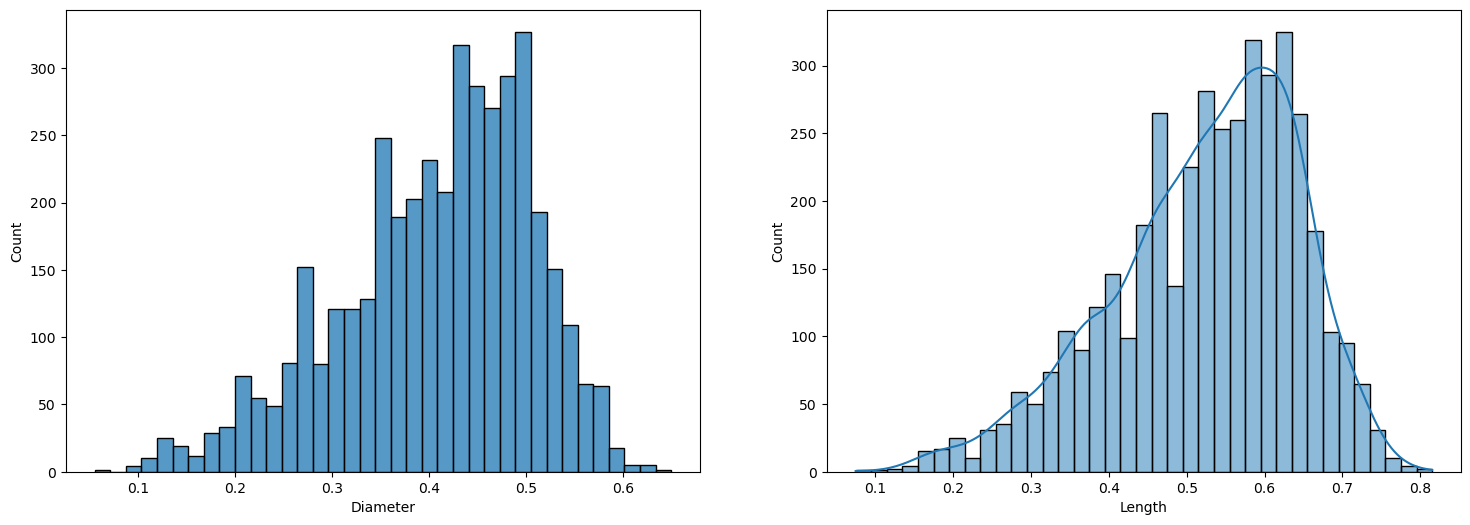

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

figure = plt.figure(figsize=(18, 6))

# Diameter 컬럼에 대한 밀도 그래프
ax1 = plt.subplot(1, 2, 1)
sns.histplot(df['Diameter'], kde=False, ax=ax1)  # kde와 히스토그램 둘 다 그려짐

# Length 컬럼에 대한 히스토그램과 kde 그래프
ax2 = plt.subplot(1, 2, 2)
sns.histplot(df['Length'], kde=True, ax=ax2)  # 실수형 데이터에도 히스토그램과 kde 가능

plt.show()


## 산점도 그리기 

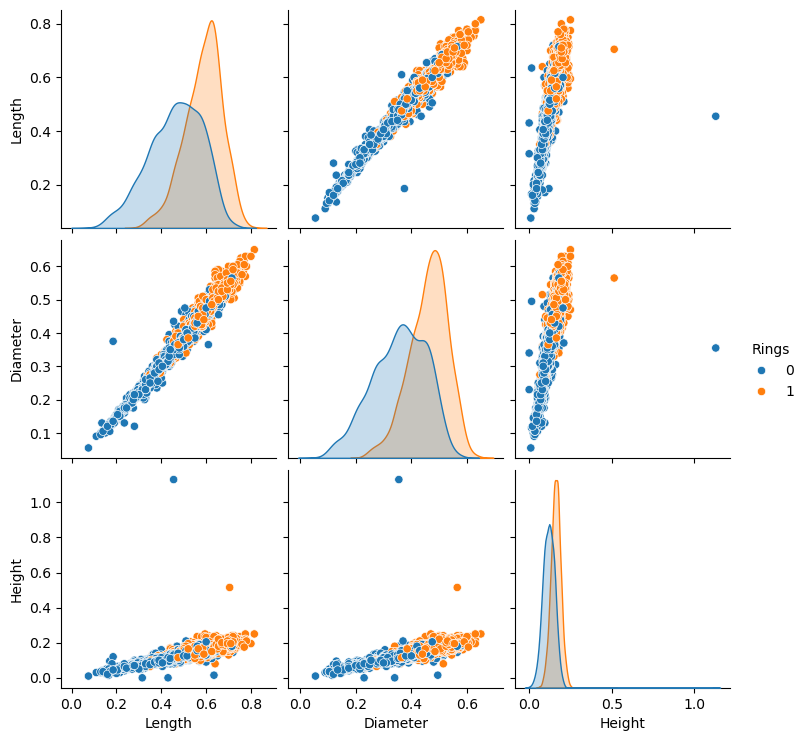

In [81]:
# 2. pairplot을 이용한 4개 속성의 상관관계 살펴보기 

sns.pairplot(df,
             vars=['Length', 'Diameter', 'Height'],
            hue ='Rings')
plt.show()

## 특징 상관관계 분석 결과 

## 우상향 
### Length와 Height, Diameter와 Height, Lenght와 Diameter, Height와 Diameterm

### 특징 히스토그램 그리기 

C:\Users\tansy\AppData\Local\Temp\ipykernel_24640\3724292575.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax) # 히스토그램 그리기


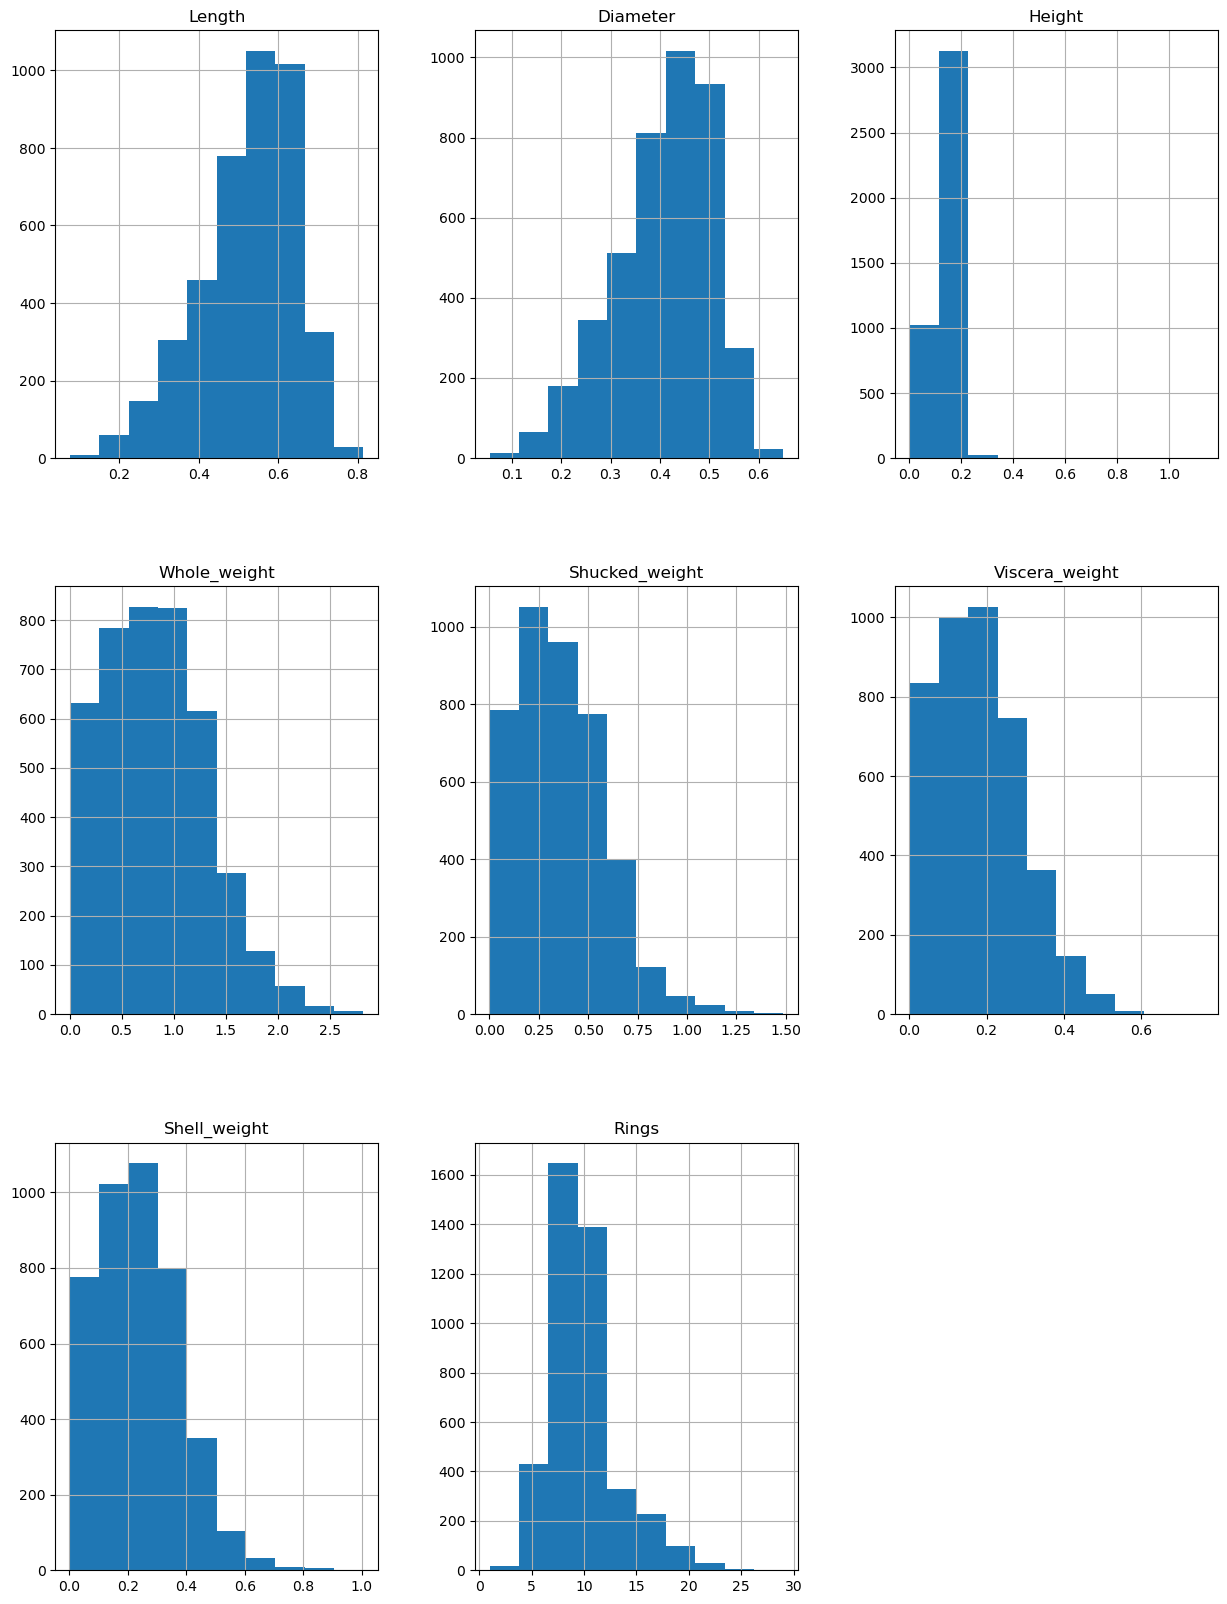

In [91]:
# 모든 칼럼의 히스토그램을 그림(분포) 

fig = plt.figure(figsize = (15,20))
ax = fig.gca() # 모든 칼럼을 축으로 활성화 
df.hist(ax = ax) # 히스토그램 그리기
plt.show()

In [4]:
# X => Label 제거된 데이터 
# 특정 열 제거
X = df.drop(columns=['Diameter', 'Length', 'Rings'])
X.head()

,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
id,,,,,,,,
0,0.095,0.5140,0.2245,0.1010,0.150,False,False,True
1,0.090,0.2255,0.0995,0.0485,0.070,False,False,True
2,0.135,0.6770,0.2565,0.1415,0.210,True,False,False
3,0.125,0.5160,0.2155,0.1140,0.155,False,False,True
4,0.080,0.2050,0.0895,0.0395,0.055,False,True,False


In [5]:
# y => 레이블 
y = df['Rings'] 
y.value_counts()

Rings
0    2096
1    2081
Name: count, dtype: int64

# 머신러닝 분류 수행 

## 1. 로지스틱 회귀(Logistic Regression) : 분류 알고리즘(확률)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
#1. 데이터셋 불러오기 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0) # train 3 : test 1 비율 

In [8]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.7760765550239235
[[424 104]
 [130 387]]


## 2. 다층 퍼셉트론(MLP) : 인공신경망 

In [12]:
from sklearn.neural_network import MLPClassifier

clf_nn = MLPClassifier(random_state=42)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))

0.8066985645933015
[[446  82]
 [120 397]]


# 3. 결정 트리


--- Decision Tree Classifier ---
0.7866028708133971
[[407 121]
 [102 415]]


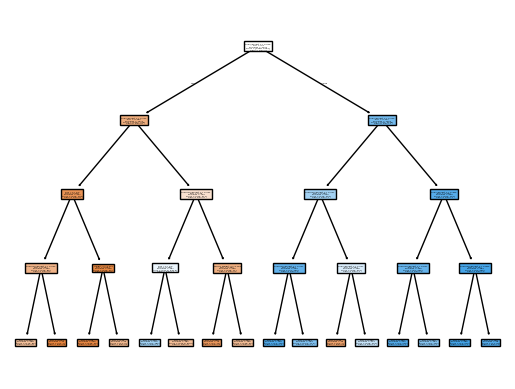

In [24]:
from sklearn import tree
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(max_depth=4, random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))

# 결정 트리 시각화
tree.plot_tree(clf_dt, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'])
plt.show()

## 5. RandomForest Classifier(랜덤 포레스트) 

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.7818181818181819
[[413 115]
 [113 404]]
